In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

In [47]:
df = pd.read_csv('dataImages3.csv', sep=',')

In [48]:
df.columns

Index(['Unnamed: 0', 'NameImage', 'centroid-0', 'centroid-1', 'area',
       'area_bbox', 'area_convex', 'area_filled', 'bbox-0', 'bbox-1', 'bbox-2',
       'bbox-3', 'centroid_local-0', 'centroid_local-1', 'eccentricity',
       'equivalent_diameter_area', 'euler_number', 'extent',
       'feret_diameter_max', 'perimeter', 'perimeter_crofton', 'solidity',
       'axis_major_length', 'axis_minor_length', 'AOL'],
      dtype='object')

In [49]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('NameImage', axis=1)
# df = df.drop('PESOABATE', axis=1)
# df = df.drop('RC', axis=1)
# df = df.drop('AOL', axis=1)
# df = df.drop('POL', axis=1)
# df = df.drop('COL', axis=1)
# df = df.drop('EGS', axis=1)
# df = df.drop('ECC', axis=1)
# df = df.drop('FAMACHA', axis=1)
# df = df.drop('CC', axis=1)
# df = df.drop('AG', axis=1)
# df = df.drop('AC', axis=1)
# df = df.drop('AP', axis=1)
# df = df.drop('CT', axis=1)
# df = df.drop('CP', axis=1)
# df = df.drop('Profund', axis=1)

df

,centroid-0,centroid-1,area,area_bbox,area_convex,area_filled,bbox-0,bbox-1,bbox-2,bbox-3,...,equivalent_diameter_area,euler_number,extent,feret_diameter_max,perimeter,perimeter_crofton,solidity,axis_major_length,axis_minor_length,AOL
0,680.628513,1292.731301,123186,253782,169228,123186,490,950,904,1563,...,396.036976,1,0.485401,683.757998,2418.015511,2295.103970,0.727929,668.454826,285.965281,"7,92"
1,647.525834,1056.260572,102770,219456,142765,102770,485,736,866,1312,...,361.733089,2,0.468294,613.965797,2187.179941,2078.939644,0.719854,598.819443,271.271107,"6,49"
2,762.059051,964.658501,155933,407550,229418,155933,513,577,1063,1318,...,445.578345,1,0.382611,874.762253,2777.093721,2635.531460,0.679689,813.456394,322.572070,"7,32"
3,572.263991,925.967098,91878,209950,131335,91878,387,643,812,1137,...,342.027342,1,0.437618,587.455530,1841.746391,1749.159285,0.699570,583.956908,246.906508,"7,27"
4,606.055707,916.184458,112302,294502,188127,112302,425,572,907,1183,...,378.136678,1,0.381328,750.016666,2376.032755,2255.301821,0.596948,678.511688,288.963727,"8,12"
5,702.059787,1426.711346,152442,419265,239040,152442,438,1052,1043,1745,...,440.562348,1,0.363593,796.925342,2526.081528,2397.556979,0.637726,780.933016,317.465241,"10,13"
6,615.209648,566.580263,86030,223231,121148,86030,447,261,826,850,...,330.963439,1,0.385386,671.300231,1972.209378,1872.453253,0.710123,626.655174,211.396859,"7,83"
7,663.807650,1118.488057,134177,323420,200817,134177,433,784,948,1412,...,413.327307,1,0.414869,715.997905,2155.677416,2046.784559,0.668156,712.900538,290.068759,"9,56"
8,634.201960,907.697296,131105,268583,186091,131105,500,539,927,1168,...,408.568318,1,0.488136,688.239784,2275.172798,2159.680587,0.704521,689.596769,307.124922,"8,5"
9,705.656379,1366.666840,113567,277095,174430,113567,501,1017,936,1654,...,380.260431,1,0.409849,711.400028,2398.713996,2277.197685,0.651075,705.392407,270.444547,"6,62"


In [50]:
# Tratar os floats que foram inseridos com virgula ao inves de ponto.

def replaceFloat(nameColumns):
    aux = [float(str(x).replace(',', '.')) for x in df[nameColumns]]
    return aux

for x in df:
    df[x] = replaceFloat(x)

df

,centroid-0,centroid-1,area,area_bbox,area_convex,area_filled,bbox-0,bbox-1,bbox-2,bbox-3,...,equivalent_diameter_area,euler_number,extent,feret_diameter_max,perimeter,perimeter_crofton,solidity,axis_major_length,axis_minor_length,AOL
0,680.628513,1292.731301,123186.0,253782.0,169228.0,123186.0,490.0,950.0,904.0,1563.0,...,396.036976,1.0,0.485401,683.757998,2418.015511,2295.103970,0.727929,668.454826,285.965281,7.92
1,647.525834,1056.260572,102770.0,219456.0,142765.0,102770.0,485.0,736.0,866.0,1312.0,...,361.733089,2.0,0.468294,613.965797,2187.179941,2078.939644,0.719854,598.819443,271.271107,6.49
2,762.059051,964.658501,155933.0,407550.0,229418.0,155933.0,513.0,577.0,1063.0,1318.0,...,445.578345,1.0,0.382611,874.762253,2777.093721,2635.531460,0.679689,813.456394,322.572070,7.32
3,572.263991,925.967098,91878.0,209950.0,131335.0,91878.0,387.0,643.0,812.0,1137.0,...,342.027342,1.0,0.437618,587.455530,1841.746391,1749.159285,0.699570,583.956908,246.906508,7.27
4,606.055707,916.184458,112302.0,294502.0,188127.0,112302.0,425.0,572.0,907.0,1183.0,...,378.136678,1.0,0.381328,750.016666,2376.032755,2255.301821,0.596948,678.511688,288.963727,8.12
5,702.059787,1426.711346,152442.0,419265.0,239040.0,152442.0,438.0,1052.0,1043.0,1745.0,...,440.562348,1.0,0.363593,796.925342,2526.081528,2397.556979,0.637726,780.933016,317.465241,10.13
6,615.209648,566.580263,86030.0,223231.0,121148.0,86030.0,447.0,261.0,826.0,850.0,...,330.963439,1.0,0.385386,671.300231,1972.209378,1872.453253,0.710123,626.655174,211.396859,7.83
7,663.807650,1118.488057,134177.0,323420.0,200817.0,134177.0,433.0,784.0,948.0,1412.0,...,413.327307,1.0,0.414869,715.997905,2155.677416,2046.784559,0.668156,712.900538,290.068759,9.56
8,634.201960,907.697296,131105.0,268583.0,186091.0,131105.0,500.0,539.0,927.0,1168.0,...,408.568318,1.0,0.488136,688.239784,2275.172798,2159.680587,0.704521,689.596769,307.124922,8.50
9,705.656379,1366.666840,113567.0,277095.0,174430.0,113567.0,501.0,1017.0,936.0,1654.0,...,380.260431,1.0,0.409849,711.400028,2398.713996,2277.197685,0.651075,705.392407,270.444547,6.62


### Ver os valores null

<AxesSubplot:>

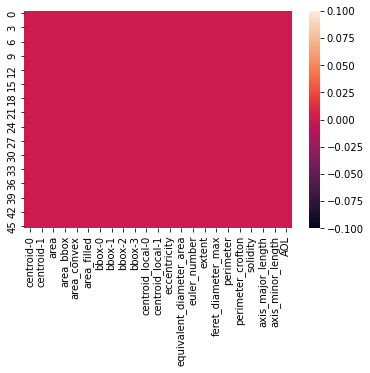

In [51]:
sns.heatmap(df.isnull())

In [52]:
df.isnull().sum() #check for missing values

centroid-0                  0
centroid-1                  0
area                        0
area_bbox                   0
area_convex                 0
area_filled                 0
bbox-0                      0
bbox-1                      0
bbox-2                      0
bbox-3                      0
centroid_local-0            0
centroid_local-1            0
eccentricity                0
equivalent_diameter_area    0
euler_number                0
extent                      0
feret_diameter_max          0
perimeter                   0
perimeter_crofton           0
solidity                    0
axis_major_length           0
axis_minor_length           0
AOL                         0
dtype: int64

### Treinando o modelo

In [53]:
X = df.drop('AOL', axis=1)
y = df['AOL']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [55]:
# # # Fit the model
# # model = LinearRegression()
# # model = model.fit(X_train, y_train)

# Fit the model
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model = model.fit(X_train, y_train)


In [56]:
importance = model.feature_importances_

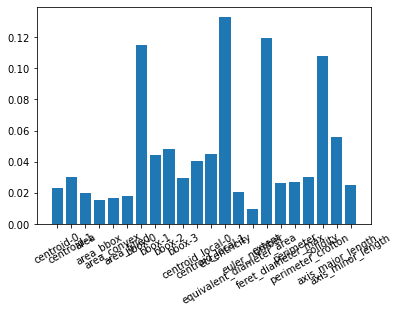

In [57]:
#histogram
plt.bar([x for x in range (len(importance))], importance)
plt.xticks([x for x in range (len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

In [58]:
y_test_predict = model.predict(X_test)

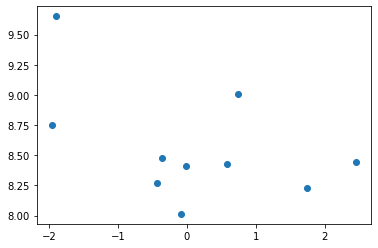

In [59]:
plt.scatter(y_test-y_test_predict,y_test_predict)
plt.show()

### Result

In [60]:
# model evaluation for training set
y_train_predict = model.predict(X_train)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)

print(f"RMSE for training is {rmse_train}")
print(f"R2 score for training is {r2_train}")

RMSE for training is 0.5371922913864291
R2 score for training is 0.8436810667984214


In [61]:
# model evaluation for training set
y_test_predict = model.predict(X_test)

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)

print(f"RMSE for testing is {rmse_test}")
print(f"R2 score for testing is {r2_test}")

RMSE for testing is 1.333071488956992
R2 score for testing is -0.2695883236469423


In [62]:
# print(model.intercept_)

In [63]:
coeff_df = pd.DataFrame(model.feature_importances_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
centroid-0,0.023010
centroid-1,0.029930
area,0.020067
area_bbox,0.015728
area_convex,0.016873
area_filled,0.017815
bbox-0,0.114995
bbox-1,0.044071
bbox-2,0.048028
bbox-3,0.029509


In [64]:
y_pred = model.predict(X_test)

In [65]:
df_aux = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_aux

,Actual,Predicted
36,7.75,9.65146
33,6.78,8.74656
16,8.39,8.41082
30,9.97,8.23091
0,7.92,8.01343
6,7.83,8.26863
42,9.00,8.42328
27,10.90,8.44012
23,9.75,9.00810
4,8.12,8.47758


In [66]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0296070000000002
Mean Squared Error: 1.777079594670011
Root Mean Squared Error: 1.333071488956992
